# SVM (Super Vector Machine)

SVM is a supervised machine learining algorithm that can be used for both classification and regression.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# load dataset into the dataframe.
df = pd.read_csv("recipes_muffins_cupcakes.csv")

In [8]:
# check the dataframe 
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


### prepare the Data

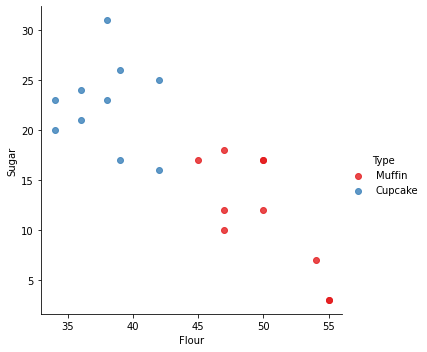

In [23]:
# plot two ingredients
sns.lmplot(x="Flour", y="Sugar", data=df,hue="Type", palette="Set1", fit_reg= False)
plt.show()

we can sperate the muffin and cupcake with the bases of Flour and sugar.

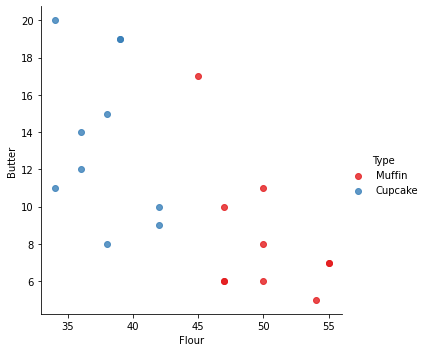

In [141]:
# why sugar? we want to other features to classified the muffin and cupcakes.lets plot the garph.
sns.lmplot(x="Flour",y= "Butter", data=df,hue="Type", palette="Set1", fit_reg= False)
plt.show()

if the we seperate the data with bases of flour and butter. we plot the graph see the speation of the data. 
they some point are very close to each other i.e. we go throuth the sugar. 

In [26]:
# specifiy the inputs 
X = df[["Flour", "Sugar"]]
X.head()

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12


In [38]:
# here our target variable is catagorical so we need to convert them to numrical.
y = np.where(df["Type"]=="Muffin", 0,1)
y[6:13]

array([0, 0, 0, 0, 1, 1, 1])

In [49]:
# fit SVM model
#from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import svm

In [47]:
# we create onject of SVC 
model = svm.SVC(kernel='linear')

In [133]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
X_train[:3]

,Flour,Sugar
18,36,24
6,54,7
14,38,23


In [52]:
y_train[:6]

array([1, 0, 1, 0, 1, 1])

In [134]:
# fit / train the model
model.fit(X_train, y_train)

SVC(kernel='linear')

In [135]:
# check the acuuracy of the model/ test the model.
model.score(X_test, y_test) * 100

100.0

In [136]:
# get sperating hyperplane
w = model.coef_[0]
a =  -w[0]/ w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]
yy[:10]

array([1.76216951e+15, 1.68225271e+15, 1.60233592e+15, 1.52241912e+15,
       1.44250233e+15, 1.36258553e+15, 1.28266874e+15, 1.20275194e+15,
       1.12283515e+15, 1.04291835e+15])

In [137]:
# plot the parallel to the seperating hyperplane that pass through support vector
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

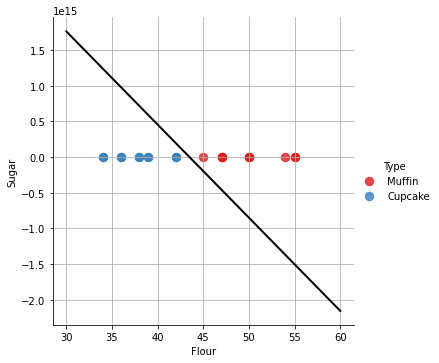

In [146]:
# plot the hyperplane
sns.lmplot(x ='Flour', y ='Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.grid()
plt.show()

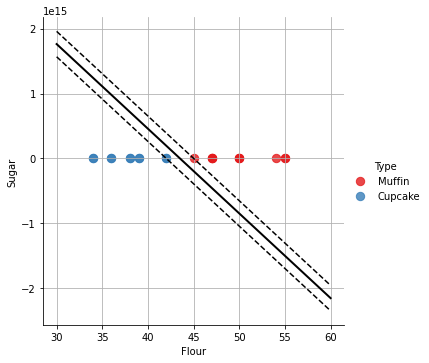

In [149]:
# Look at the margins and support vectors
#data samples
sns.lmplot(x='Flour', y='Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')#hyperplane
plt.plot(xx, yy_down, 'k--') #marginLine1
plt.plot(xx, yy_up, 'k--') #margineLine2
plt.grid()
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [150]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [153]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [171]:
muffin_or_cupcake(25,33)

You're looking at a cupcake recipe!


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


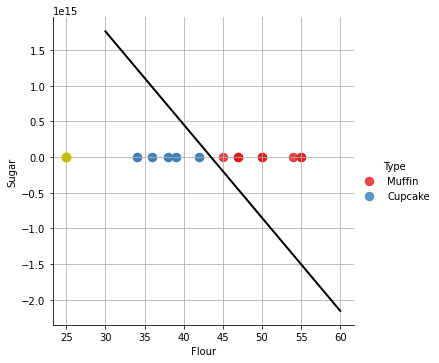

In [181]:
# Plot the point to visually see where the point lies
sns.lmplot(x='Flour', y='Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(25, 33, 'yo', markersize='9');
plt.grid()
plt.show()